In [1]:
import os 
os.chdir('../../')
from epigraphhub.models.plots import plot_val_ngb
from epigraphhub.models.ngboost_models import compute_metrics
from epigraphhub.models.forecast_swiss import get_clusters_swiss, train_eval_single_canton, get_cluster_by_canton

## Train and eval (ratio = 0.75) 

### Hospitalizations

In [2]:
def train_eval(target_curve_name = 'hosp', predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d'], ini_date = '2020-05-01', end_date = '2022-04-30',  canton = 'GE'):
    
    df_eval = train_eval_single_canton(target_curve_name, canton, predictors, ini_date = ini_date, end_date = end_date)
    
    dict_name = {'hosp': 'New hospitalizations',
                'total_hosp': 'Total Hospitalizations', 
                'icu_patients': 'Total ICU patients'}
    
    plot_val_ngb(df_eval, title = f'{dict_name[target_curve_name]} in {canton}', path = './examples/forecast_switzerland/plots', name = f'val_{target_curve_name}_{canton}', save = True)

    df_m = compute_metrics(df_eval)
    
    df_m.to_csv(f'./examples/forecast_switzerland/metrics/val_{target_curve_name}_{canton}.csv')
    
    return df_eval, df_m

#### Geneva

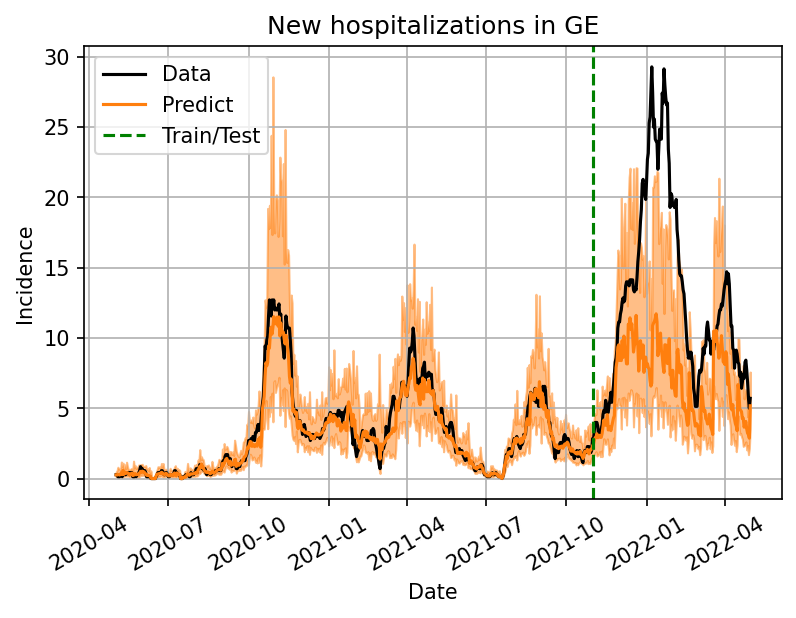

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,0.285714,0.147527,0.267606,0.485422,547,GE
2020-05-03,0.285714,0.122646,0.259627,0.549603,547,GE
2020-05-04,0.142857,0.116399,0.308037,0.815190,547,GE
2020-05-05,0.142857,0.119618,0.291560,0.710655,547,GE
2020-05-06,0.142857,0.100653,0.262144,0.682736,547,GE


In [3]:
df_eval, df_m = train_eval(canton = 'GE')

df_eval.head()

In [4]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.947880,0.378433
mean_absolute_error,0.413578,6.105655
mean_squared_error,0.478630,65.524626
root_mean_squared_error,0.691831,8.094728
mean_squared_log_error,0.015704,0.377289


#### Berna

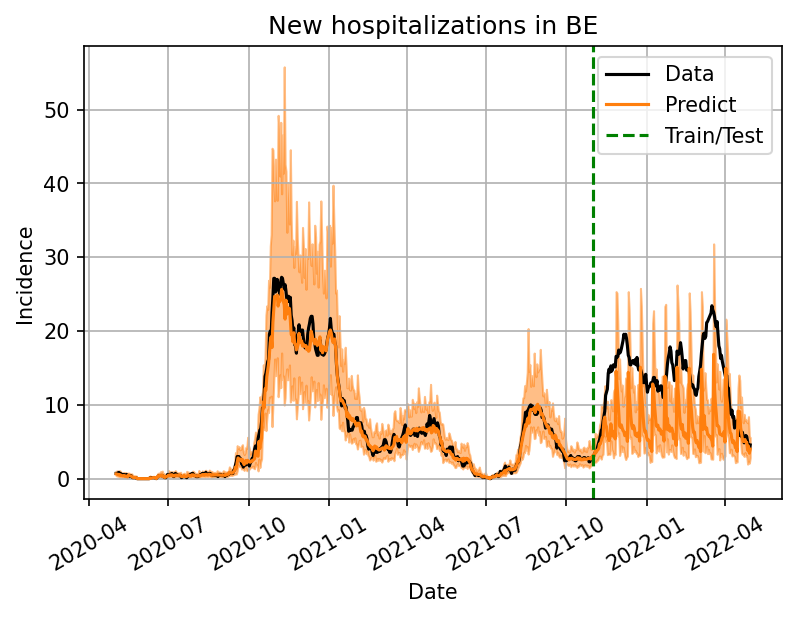

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,0.714286,0.417510,0.647536,1.004295,547,BE
2020-05-03,0.714286,0.367084,0.623527,1.059119,547,BE
2020-05-04,0.714286,0.332404,0.555771,0.929235,547,BE
2020-05-05,0.857143,0.334142,0.580533,1.008607,547,BE
2020-05-06,0.714286,0.208719,0.477336,1.091659,547,BE


In [5]:
df_eval, df_m = train_eval(canton = 'BE')

df_eval.head()

In [6]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.986242,0.071867
mean_absolute_error,0.492980,6.687333
mean_squared_error,0.711916,63.864884
root_mean_squared_error,0.843751,7.991551
mean_squared_log_error,0.009407,0.476992


#### Zurich

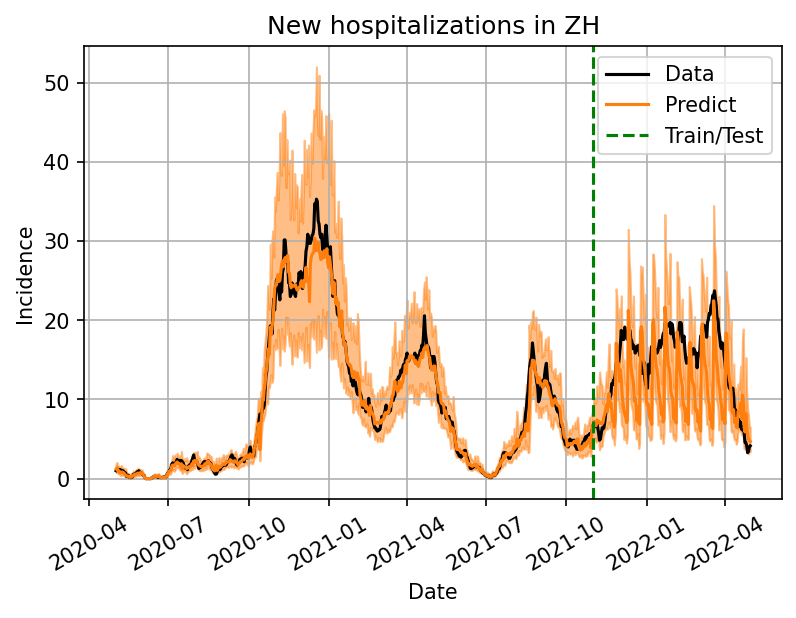

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,1.000000,0.790825,1.229063,1.910151,547,ZH
2020-05-03,1.285714,0.946320,1.391895,2.047268,547,ZH
2020-05-04,1.142857,0.597081,0.961624,1.548734,547,ZH
2020-05-05,1.142857,0.623748,1.011369,1.639871,547,ZH
2020-05-06,0.857143,0.571930,0.889039,1.381973,547,ZH


In [7]:
df_eval, df_m = train_eval(canton = 'ZH')

df_eval.head()

In [8]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.983271,0.051556
mean_absolute_error,0.686739,4.649181
mean_squared_error,1.384152,34.445236
root_mean_squared_error,1.176500,5.869006
mean_squared_log_error,0.010500,0.193632


### Total hospitalizations 

#### Geneva

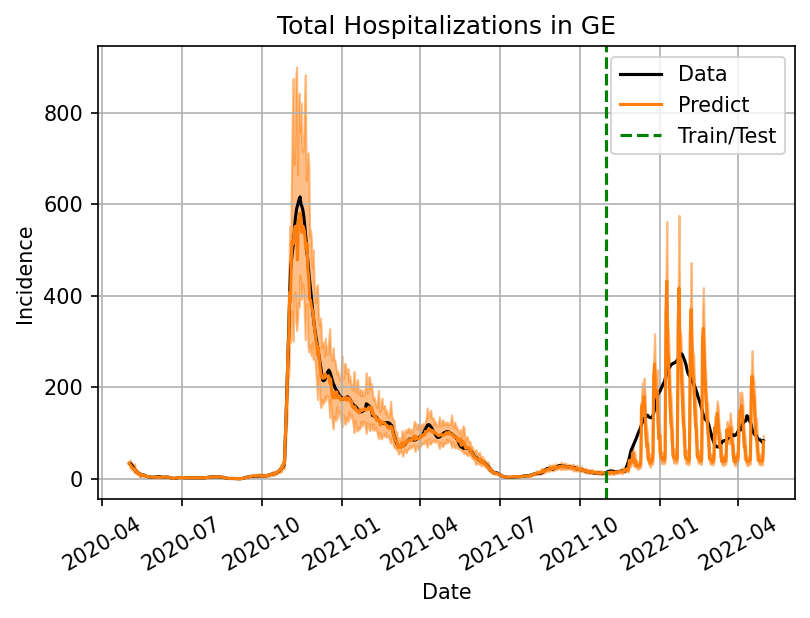

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,33.285714,27.930131,33.410038,39.965105,547,GE
2020-05-03,33.285714,22.675962,30.317983,40.535441,547,GE
2020-05-04,31.714286,21.380039,27.813252,36.182206,547,GE
2020-05-05,29.000000,18.964271,25.038924,33.059416,547,GE
2020-05-06,26.142857,17.854619,23.606033,31.210118,547,GE


In [9]:
df_eval, df_m = train_eval(target_curve_name = 'total_hosp', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'GE')

df_eval.head()

In [10]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.994220,-0.208212
mean_absolute_error,3.617136,64.679056
mean_squared_error,91.432120,7673.056458
root_mean_squared_error,9.562014,87.595984
mean_squared_log_error,0.005997,0.644581


#### Berna

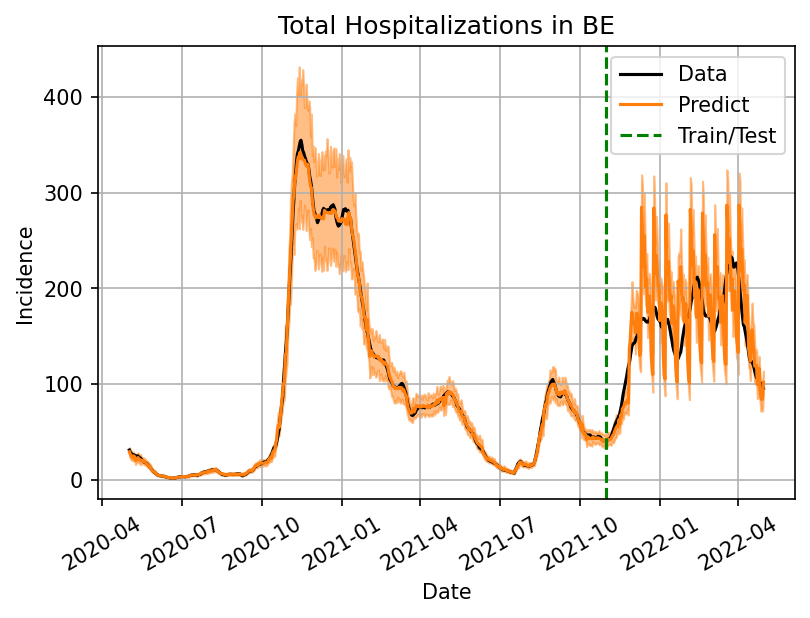

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,31.142857,25.638087,29.345332,33.588642,547,BE
2020-05-03,28.857143,22.487348,26.843735,32.044068,547,BE
2020-05-04,27.714286,20.944982,24.655839,29.024154,547,BE
2020-05-05,26.857143,20.605361,24.827672,29.915190,547,BE
2020-05-06,26.357143,19.491526,23.059382,27.280321,547,BE


In [11]:
df_eval, df_m = train_eval(target_curve_name = 'total_hosp', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'BE')

df_eval.head()

In [12]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.998814,0.178983
mean_absolute_error,1.909893,33.863403
mean_squared_error,10.730714,1880.473810
root_mean_squared_error,3.275777,43.364430
mean_squared_log_error,0.002166,0.059774


#### Zurich 

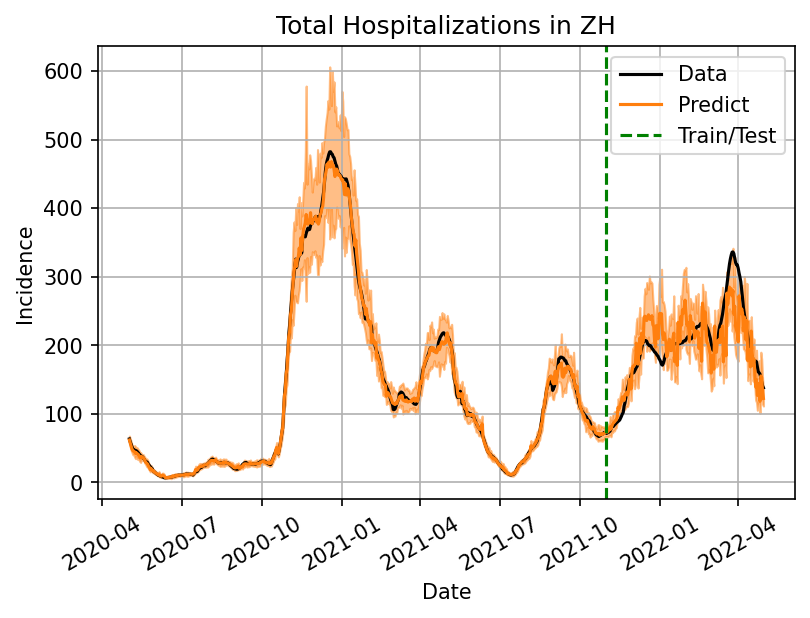

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,63.428571,56.707767,61.921427,67.614427,547,ZH
2020-05-03,59.000000,51.733571,57.563624,64.050687,547,ZH
2020-05-04,55.857143,46.983733,52.890958,59.540894,547,ZH
2020-05-05,52.142857,43.581139,48.758845,54.551694,547,ZH
2020-05-06,49.000000,40.329514,46.243800,53.025410,547,ZH


In [13]:
df_eval, df_m = train_eval(target_curve_name = 'total_hosp', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'ZH')

df_eval.head()

In [14]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.997775,0.694927
mean_absolute_error,3.511964,24.892486
mean_squared_error,36.442412,1091.421548
root_mean_squared_error,6.036755,33.036670
mean_squared_log_error,0.002531,0.022650


### Total ICU patients

#### Geneva

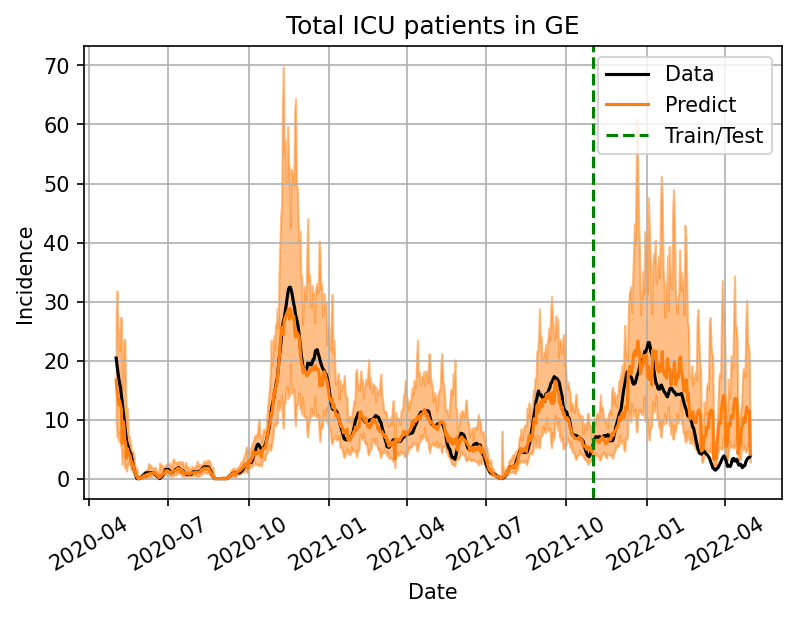

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,20.428571,10.074531,16.680072,27.616651,547,GE
2020-05-03,19.285714,7.080763,15.010109,31.819084,547,GE
2020-05-04,18.142857,7.703367,14.049689,25.624348,547,GE
2020-05-05,17.000000,6.406052,12.526169,24.493231,547,GE
2020-05-06,16.142857,8.076032,13.213784,21.620033,547,GE


In [15]:
df_eval, df_m = train_eval(target_curve_name = 'icu_patients', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'GE')

df_eval.head()

In [16]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.972374,0.637572
mean_absolute_error,0.777493,3.713994
mean_squared_error,1.526410,21.708042
root_mean_squared_error,1.235480,4.659189
mean_squared_log_error,0.016622,0.332395


#### Berna

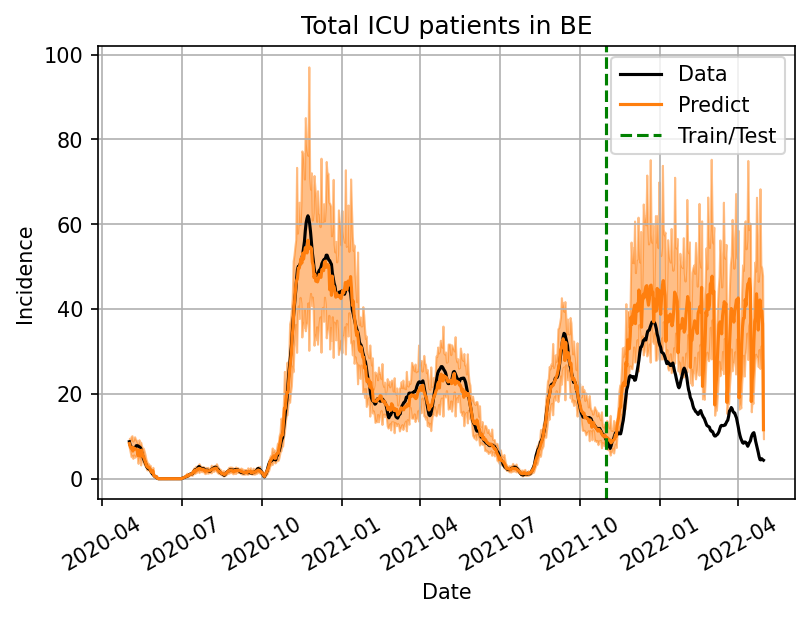

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,8.714286,7.199170,8.287434,9.540206,547,BE
2020-05-03,7.857143,6.227087,7.504796,9.044673,547,BE
2020-05-04,7.571429,5.189676,7.185623,9.949210,547,BE
2020-05-05,7.285714,5.420892,7.415117,10.142973,547,BE
2020-05-06,7.285714,4.783966,6.509206,8.856619,547,BE


In [17]:
df_eval, df_m = train_eval(target_curve_name = 'icu_patients', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'BE')

df_eval.head()

In [18]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.993033,-0.288018
mean_absolute_error,0.795254,16.204038
mean_squared_error,1.820261,365.856213
root_mean_squared_error,1.349171,19.127368
mean_squared_log_error,0.004608,0.664590


#### Zurich

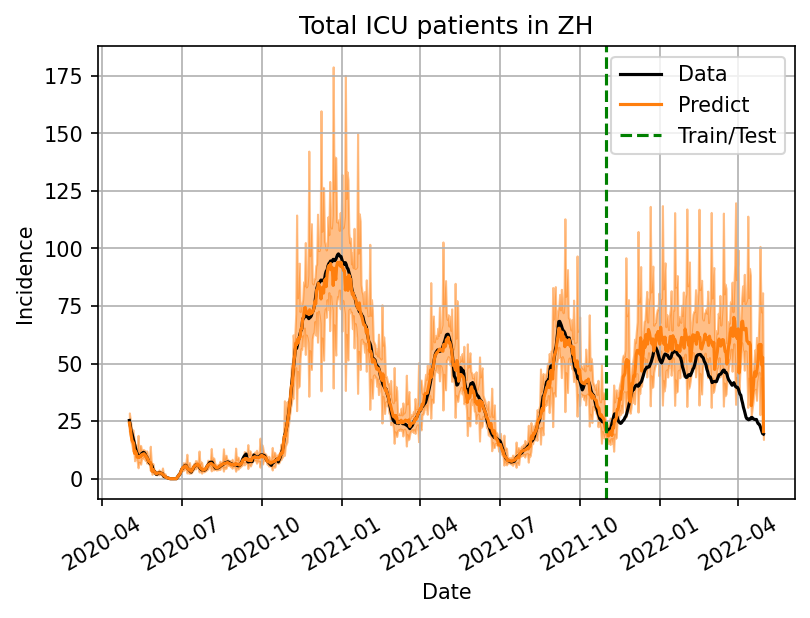

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,25.285714,20.538521,24.223450,28.569513,547,ZH
2020-05-03,23.285714,18.885250,22.094878,25.849996,547,ZH
2020-05-04,20.857143,15.905229,19.027413,22.762479,547,ZH
2020-05-05,19.571429,14.435472,16.692868,19.303272,547,ZH
2020-05-06,18.000000,11.960392,15.940407,21.244838,547,ZH


In [19]:
df_eval, df_m = train_eval(target_curve_name = 'icu_patients', 
                           predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'],
                           canton = 'ZH')

df_eval.head()

In [20]:
df_m.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.993751,0.225410
mean_absolute_error,1.347858,12.752085
mean_squared_error,4.662700,247.933089
root_mean_squared_error,2.159329,15.745891
mean_squared_log_error,0.003682,0.127397
